In [39]:
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn import metrics
import xgboost as xgb


plt.rcParams['font.size'] = 12


df = pd.read_csv('build/training_data.csv')
lbl = df['label']
df = df.drop(columns='label')

Xtrain,Xtest, ytrain, ytest = train_test_split(df, lbl, test_size = 0.3, random_state = 555)
df

cols = Xtrain.columns

scaler = RobustScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [8]:
Xtrain = pd.DataFrame(Xtrain, columns=[cols])
Xtest = pd.DataFrame(Xtest, columns=[cols])
Xtrain.head()

,LineFit_TTParams.lf_vel_z,HitStatisticsValues.max_pulse_time,SplineMPEFitParams.rlogl,HitStatisticsValues.z_travel,SplineMPEDirectHitsA.n_dir_strings,LineFit_TT.zenith,NewAtt.DeltaZd,MuEXAngular4.zenith,NewAtt.SplineVerRadius,SplineMPEDirectHitsA.n_dir_doms,...,MPEFitParaboloid.zenith,SplineMPETruncatedEnergy_SPICEMie_AllBINS_MuEres.value,MPEFitParaboloidFitParams.zenith,SplineMPETruncatedEnergy_SPICEMie_AllDOMS_MuEres.value,SPEFit2Bayesian.z,SplineMPECharacteristics.track_hits_separation_length,SplineMPEDirectHitsC.n_dir_doms,LineFit_TTParams.lf_vel,HitStatisticsValues.z_min,MPEFitParaboloidFitParams.err1
0,-0.149118,1.373349,1.962738,-0.320388,-0.5,-0.167988,0.228157,-0.312130,-0.093043,-0.666667,...,-0.240372,0.613575,-0.241391,0.417655,0.341134,-0.761229,-0.4,-0.452796,0.420603,1.964046
1,1.078592,0.793086,0.694196,2.908549,-0.5,1.327643,0.202832,1.490469,0.597893,-0.666667,...,1.464812,0.000000,1.464587,0.000000,0.396157,0.834750,-0.4,-0.594647,-0.144543,-0.020511
2,-0.274077,-0.645194,0.578448,-0.328365,0.5,-0.289647,0.255647,-0.222714,0.747698,0.666667,...,-0.209236,0.613575,-0.210240,0.417655,0.758988,-0.001854,0.2,-0.429162,0.649632,0.112234
3,-0.270140,1.091436,-0.315378,-0.460970,-1.0,-0.274105,-0.470000,-0.371428,-0.109992,-1.000000,...,-0.460136,-1.024089,-0.461257,-0.796593,0.606655,2.284443,-0.2,0.394391,0.589450,-0.302649
4,-0.324825,0.006541,-0.081001,-0.486130,-0.5,-0.329588,0.860658,-0.456157,0.394289,0.000000,...,-0.280400,-0.386425,-0.281437,-0.170974,0.622103,0.317414,-0.4,-0.076872,0.610815,0.839229


In [10]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

GaussianNB()

In [11]:
ypred = gnb.predict(Xtest)

ypred

array([1., 0., 1., ..., 0., 0., 0.])

In [12]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(ytest, ypred)))
ypredtrain = gnb.predict(Xtrain)

ypredtrain
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(ytrain, ypredtrain)))
print('Training set score: {:.4f}'.format(gnb.score(Xtrain, ytrain)))

print('Test set score: {:.4f}'.format(gnb.score(Xtest, ytest)))
ytest.value_counts()

Model accuracy score: 0.8371
Training-set accuracy score: 0.8345
Training set score: 0.8345
Test set score: 0.8371


label
1.0    5350
0.0    5346
Name: count, dtype: int64

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, ypred)

print('Confusion matrix\n\n', cm)

print('\nBackground(Actual) = ', cm[0,0])

print('\nSignal(Predicted) = ', cm[1,1])

print('\nBackground(Predicted) = ', cm[0,1])

print('\nSignal(Actual) = ', cm[1,0])

Confusion matrix

 [[4856  490]
 [1252 4098]]

Background(Actual) =  4856

Signal(Predicted) =  4098

Background(Predicted) =  490

Signal(Actual) =  1252


In [16]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85      5346
         1.0       0.89      0.77      0.82      5350

    accuracy                           0.84     10696
   macro avg       0.84      0.84      0.84     10696
weighted avg       0.84      0.84      0.84     10696



In [17]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [18]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8371


In [19]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1629


In [20]:
precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9083


In [21]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7950


In [22]:
ypredprob = gnb.predict_proba(Xtest)[0:10]

ypredprob

array([[3.24245029e-012, 1.00000000e+000],
       [9.99999859e-001, 1.40981459e-007],
       [8.75530192e-042, 1.00000000e+000],
       [9.99999999e-001, 1.24551954e-009],
       [9.99999991e-001, 8.50785562e-009],
       [6.56585545e-029, 1.00000000e+000],
       [1.00000000e+000, 5.09480236e-013],
       [1.67397450e-192, 1.00000000e+000],
       [2.24396695e-014, 1.00000000e+000],
       [1.75941650e-082, 1.00000000e+000]])

In [23]:
gnb.predict_proba(Xtest)[0:10, 1]

array([1.00000000e+00, 1.40981459e-07, 1.00000000e+00, 1.24551954e-09,
       8.50785562e-09, 1.00000000e+00, 5.09480236e-13, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00])

In [24]:
ypred1 = gnb.predict_proba(Xtest)[:, 1]

ypred1

array([1.00000000e+00, 1.40981459e-07, 1.00000000e+00, ...,
       1.77331131e-09, 1.19818692e-08, 5.78068483e-09])

Text(0, 0.5, 'Frequency')

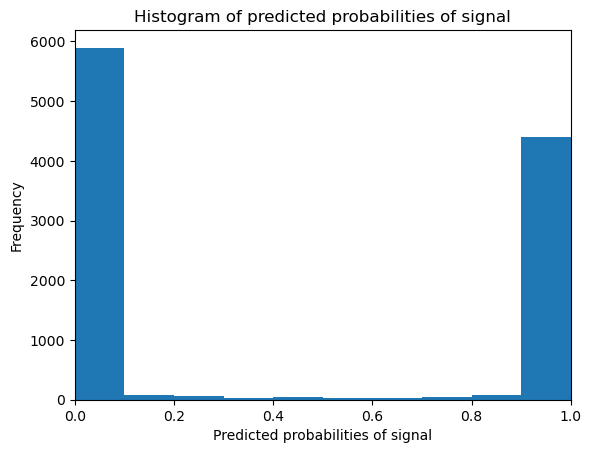

In [25]:
plt.hist(ypred1, bins = 10)
plt.title('Histogram of predicted probabilities of signal')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of signal')
plt.ylabel('Frequency')

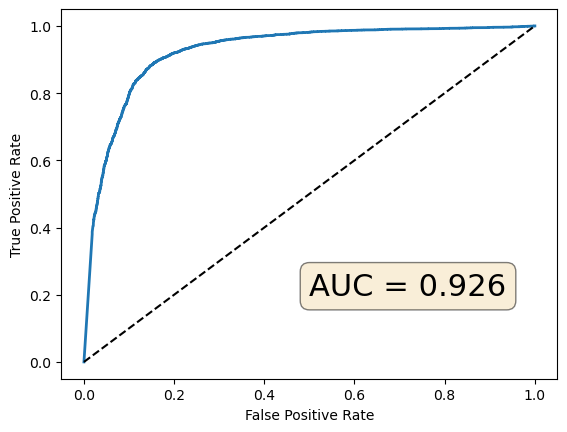

In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, tresholds = roc_curve(ytest, ypred1)
fprgnb, tprgnb, tresholds = roc_curve(ytest, ypred1)


AUC = metrics.roc_auc_score(ytest, ypred1)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12



props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.text(0.5, 0.2, f'AUC = {np.round(AUC, 3)}', fontsize = 22, bbox = props)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.savefig('build/GNBRoc.pdf')

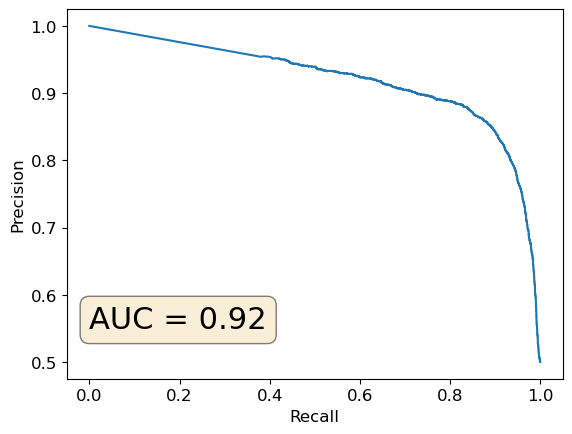

In [40]:
#Calc Precision Recall curve
prec, rec, thresh = metrics.precision_recall_curve(ytest, ypred1)

prcauc = np.sum((rec[:-1]-rec[1:])*(prec[1:]+prec[:-1])/2)

plt.text(0.0, 0.55, f'AUC = {np.round(prcauc, 3)}', fontsize = 22, bbox = props)


plt.plot(rec, prec)
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.savefig('build/GNBPRC.pdf')

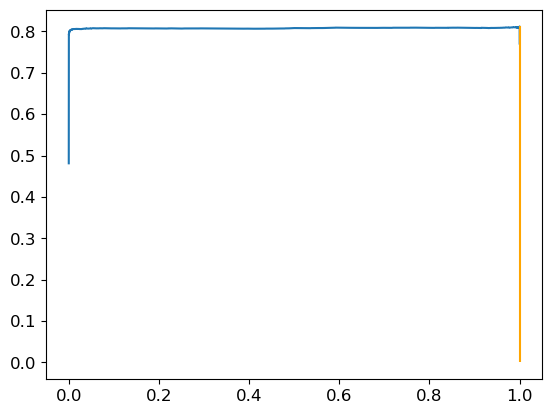

In [28]:
#Find Threshold with fbeta score
def fbeta(p, r, beta = 0.1):
    return (1+beta**2)*(p*r)/(beta*p+r)

fb = fbeta(prec, rec)[:-1]
argTr = np.argmax(fb)
plt.plot(thresh, fb)
plt.vlines(thresh[argTr], 0, fb[argTr], color = 'orange', label = 'peak')
plt.savefig('build/GNBFbeta.pdf')

In [38]:
#save ROC,AUC and fbeta curve to disk
file = open('build/GNBPRC.txt', 'w')
file.write('#Precision Recal fb thresh\n')
for f, t,b, tr in zip(prec[:-1], rec[:-1], fb, thresh):
    file.write(f'{f} {t} {b} {tr}\n')
file.close()

In [36]:
#save ROC,AUC curve to disk
file = open('build/GNBRoc.txt', 'w')
file.write('#fpr tpr\n')
for f, t in zip(fpr, tpr):
    file.write(f'{f} {t}\n')
file.write(f'-1 {AUC}')
file.close()